# 01 - ComCam x Milliquas
**Author:** Olivia Lynn & Neven Caplar 
**Last Run:** June 16, 2025

## Set up
Imports and dask

In [47]:
import lsdb
print(lsdb.__version__)
import hats
print(hats.__version__)
import astropy.units as u
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np
import pandas as pd

from lsdb.core.search import ConeSearch

from dask.distributed import Client
from nested_pandas import NestedDtype

0.6.0
0.6


In [48]:
client = Client(n_workers=4, memory_limit="24GB", threads_per_worker=1)
client

/sdf/home/n/ncaplar/.local/lib/python3.12/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 13237 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:19091
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:13237/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:4261'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:28071'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:16391'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:5823'


INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:23605 name: 2
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:23605
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:63462
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:22377 name: 3
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:22377
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:63474
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:32265 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:32265
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:63452
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:17695 name: 1
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:17695
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:63472
INFO:distributed.scheduler:Receive client co

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:13237/status,
Dashboard: http://127.0.0.1:13237/status,Workers: 4
Total threads: 4,Total memory: 89.41 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:19091,Workers: 4
Dashboard: http://127.0.0.1:13237/status,Total threads: 4
Started: Just now,Total memory: 89.41 GiB
Comm: tcp://127.0.0.1:32265,Total threads: 1
Dashboard: http://127.0.0.1:13863/status,Memory: 22.35 GiB
Nanny: tcp://127.0.0.1:4261,


INFO:distributed.scheduler:Remove client Client-7b15c63d-4ad0-11f0-9796-303ea7003404
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:63496; closing.
INFO:distributed.scheduler:Remove client Client-7b15c63d-4ad0-11f0-9796-303ea7003404
INFO:distributed.scheduler:Close client connection: Client-7b15c63d-4ad0-11f0-9796-303ea7003404
INFO:distributed.scheduler:Retire worker addresses (stimulus_id='retire-workers-1750092015.4068172') (0, 1, 2, 3)
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:63452; closing.
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:63472; closing.
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:63462; closing.
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:32265 name: 0 (stimulus_id='handle-worker-cleanup-1750092015.4139178')
INFO:distributed.scheduler:Remove worker addr: tcp://127.0.0.1:17695 name: 1 (stimulus_id='handle-worker-cleanup-1750092015.4144957')
INFO:distributed.sch

## Get catalogs
ComCam object catalog and MilliQuas - we will crossmatch

In [49]:
comcam_cat = lsdb.open_catalog('/sdf/data/rubin/shared/lsdb_commissioning/hats/v29_0_0/object_collection/object_lc')
comcam_cat_lite = lsdb.open_catalog('/sdf/data/rubin/shared/lsdb_commissioning/hats/v29_0_0/object_collection_lite/object_lc')

comcam_cat

Dask NestedFrame Structure:
                              tract           patch            z_ra           z_dec         z_raErr        z_decErr    z_ra_dec_Cov       z_psfFlux    z_psfFluxErr  z_free_psfFlux z_free_psfFluxErr z_free_psfFlux_flag          z_bdE1          z_bdE2         z_bdReB         z_bdReD        z_bdChi2       z_bdFluxB    z_bdFluxBErr       z_bdFluxD    z_bdFluxDErr   z_gaapPsfFlux z_gaapPsfFluxErr   z_gaap0p7Flux z_gaap0p7FluxErr   z_gaap1p0Flux z_gaap1p0FluxErr   z_gaap1p5Flux z_gaap1p5FluxErr   z_gaap2p5Flux z_gaap2p5FluxErr   z_gaap3p0Flux z_gaap3p0FluxErr z_gaapOptimalFlux z_gaapOptimalFluxErr           z_ixx           z_iyy           z_ixy       z_i_flag        z_ixxPSF        z_iyyPSF        z_ixyPSF    z_iPSF_flag      z_ixxRound      z_iyyRound      z_ixyRound  z_iRound_flag z_ixxDebiasedPSF z_iyyDebiasedPSF z_ixyDebiasedPSF z_iDebiasedPSF_flag       z_kronRad      z_kronFlux   z_kronFluxErr     z_calibFlux  z_calibFluxErr      z_ap03Flux   z_ap03FluxErr z_ap03Flux_flag      z_ap06Flux   z_ap06FluxErr z_ap06Flux_flag      z_ap09Flux   z_ap09FluxErr z_ap09Flux_flag      z_ap12Flux   z_ap12FluxErr z_ap12Flux_flag      z_ap17Flux   z_ap17FluxErr z_ap17Flux_flag      z_ap25Flux   z_ap25FluxErr z_ap25Flux_flag      z_ap35Flux   z_ap35FluxErr z_ap35Flux_flag      z_ap50Flux   z_ap50FluxErr z_ap50Flux_flag      z_ap70Flux   z_ap70FluxErr z_ap70Flux_flag  z_extendedness z_sizeExtendedness   z_blendedness          z_fwhm    z_cModelFlux z_cModelFluxErr z_cModelFlux_inner z_free_cModelFlux z_free_cModelFluxErr z_free_cModelFlux_inner z_free_cModelFlux_flag z_hsmShapeRegauss_e1 z_hsmShapeRegauss_e2 z_hsmShapeRegauss_sigma z_hsmShapeRegauss_flag z_hsm_moments_30 z_hsm_momentsPsf_30 z_hsm_moments_21 z_hsm_momentsPsf_21 z_hsm_moments_12 z_hsm_momentsPsf_12 z_hsm_moments_03 z_hsm_momentsPsf_03 z_hsm_moments_40 z_hsm_momentsPsf_40 z_hsm_moments_31 z_hsm_momentsPsf_31 z_hsm_moments_22 z_hsm_momentsPsf_22 z_hsm_moments_13 z_hsm_momentsPsf_13 z_hsm_moments_04 z_hsm_momentsPsf_04 z_hsm_moments_flag z_hsm_momentsPsf_flag    z_inputCount z_deblend_dataCoverage z_deblend_blendedness z_deblend_fluxOverlap z_deblend_fluxOverlapFraction z_deblend_zeroFlux z_psfModel_TwoGaussian_gauss1_sigma_x z_psfModel_TwoGaussian_gauss1_sigma_y z_psfModel_TwoGaussian_gauss1_rho z_psfModel_TwoGaussian_gauss1_fluxfrac z_psfModel_TwoGaussian_gauss2_sigma_x z_psfModel_TwoGaussian_gauss2_sigma_y z_psfModel_TwoGaussian_gauss2_rho z_psfModel_TwoGaussian_n_iter z_psfModel_TwoGaussian_chisq_reduced z_psfModel_TwoGaussian_unknown_flag z_psfModel_TwoGaussian_no_inputs_flag z_inputCount_flag z_inputCount_flag_noInputs  z_psfFlux_area z_psfFlux_flag z_psfFlux_flag_apCorr z_psfFlux_flag_edge z_psfFlux_flag_noGoodPixels  z_cModel_flag z_cModel_flag_apCorr z_gaapFlux_flag z_gaapFlux_flag_edge z_gaapFlux_flag_gaussianization z_gaapOptimalFlux_flag_bigPsf z_gaap0p7Flux_flag_bigPsf z_gaap1p0Flux_flag_bigPsf z_gaap1p5Flux_flag_bigPsf z_gaap2p5Flux_flag_bigPsf z_gaap3p0Flux_flag_bigPsf z_blendedness_flag z_pixelFlags_bad z_pixelFlags_clipped z_pixelFlags_clippedCenter z_pixelFlags_cr z_pixelFlags_crCenter z_pixelFlags_edge z_pixelFlags_inexact_psf z_pixelFlags_inexact_psfCenter z_pixelFlags_interpolated z_pixelFlags_interpolatedCenter z_pixelFlags_nodata z_pixelFlags_offimage z_pixelFlags_saturated z_pixelFlags_saturatedCenter z_pixelFlags_sensor_edge z_pixelFlags_sensor_edgeCenter z_pixelFlags_suspect z_pixelFlags_suspectCenter z_extendedness_flag z_sizeExtendedness_flag z_invalidPsfFlag z_calib_astrometry_used z_calib_photometry_reserved z_calib_photometry_used z_calib_psf_candidate z_calib_psf_reserved z_calib_psf_used  z_apFlux_flag z_apFlux_flag_apertureTruncated z_apFlux_flag_sincCoeffsTruncated z_calibFlux_flag z_calibFlux_flag_apertureTruncated z_calibFlux_flag_sincCoeffsTruncated z_centroid_flag    z_centroid_x z_centroid_xErr    z_centroid_y z_centroid_yErr z_kronFlux_flag z_kronFlux_flag_bad_radius z_kronFlux_flag_bad_shape z_kronFlux_flag_bad_sha

In [50]:
miliquas_cat = lsdb.read_hats(
    "/sdf/data/rubin/user/olynn/AGNs/hats/Milliquas_v8",
    margin_cache="/sdf/data/rubin/u/olynn/AGNs/hats/Milliquas_v8_margin/Milliquas_v8_10arcs",
)

miliquas_cat

,RA,DEC,NAME,TYPE,RMAG,BMAG,COMMENT,R,B,Z,CITE,ZCITE,XNAME,RNAME,LOBE1,LOBE2
npartitions=12,,,,,,,,,,,,,,,,
"Order: 0, Pixel: 0",double[pyarrow],double[pyarrow],string[pyarrow],string[pyarrow],float[pyarrow],float[pyarrow],string[pyarrow],string[pyarrow],string[pyarrow],float[pyarrow],string[pyarrow],string[pyarrow],string[pyarrow],string[pyarrow],string[pyarrow],string[pyarrow]
"Order: 0, Pixel: 1",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 0, Pixel: 10",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Order: 0, Pixel: 11",...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


## Do crossmatch
ComCam x MilliQuas

In [51]:
miliquas_cat.hc_structure.original_schema

_healpix_29: int64
RA: double
DEC: double
NAME: string
TYPE: string
RMAG: float
BMAG: float
COMMENT: string
R: string
B: string
Z: float
CITE: string
ZCITE: string
XNAME: string
RNAME: string
LOBE1: string
LOBE2: string

In [52]:
comcam_x_milliquas = comcam_cat_lite.crossmatch(miliquas_cat, suffixes=["_COM", "_MIL"], radius_arcsec=.1)
# comcam_x_milliquas

## Verify crossmatch

/sdf/home/n/ncaplar/.local/lib/python3.12/site-packages/hats/inspection/visualize_catalog.py:298: UserWarning: This plot contains HEALPix pixels smaller than a pixel of the plot. Some values may be lost
  warnings.warn(


(<Figure size 1000x500 with 2 Axes>,
 <WCSAxes: title={'center': 'COMCAM x Milliquas'}>)

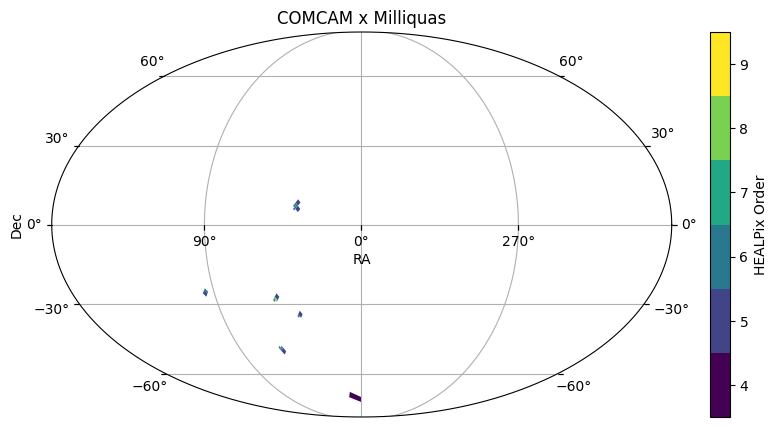

In [53]:
comcam_x_milliquas.plot_pixels(plot_title="COMCAM x Milliquas")

In [54]:
comcam_x_milliquas_computed = comcam_x_milliquas.compute()

In [55]:
comcam_x_milliquas_computed

objectId_COM  refFwhm_COM shape_flag_COM  \
_healpix_29                                                           
9583286184993797     648364139835568333     0.886099          False   
9589207111731327     648371355380623926      0.96916          False   
...                                 ...          ...            ...   
2530267219088180889  611256515751335314     0.830496          False   
2531113080423557808  604071413422258466     0.611351          False   

                     parentObjectId_COM         x_COM         y_COM  xErr_COM  \
_healpix_29                                                                     
9583286184993797     648364139835556915   7120.147041   9737.127075  0.006148   
9589207111731327     648371355380614480  21169.155023  10207.560599  0.006709   
...                                 ...           ...           ...       ...   
2530267219088180889  611256515751317288  15990.243925  14591.651573  0.111332   
2531113080423557808  604071413422233895   25440.71201  25978.574385   0.00414   

                     yErr_COM  shape_yy_COM  shape_xx_COM  ...  R_MIL  B_MIL  \
_healpix_29                                                ...                 
9583286184993797     0.006627      5.333351       4.85955  ...      -      -   
9589207111731327     0.008974      7.297463      4.808968  ...      1      -   
...                       ...           ...           ...  ...    ...    ...   
2530267219088180889  0.087305      8.684189      9.680491  ...      -      -   
2531113080423557808  0.003418       2.18433      2.643317  ...      -      -   

                     Z_MIL  CITE_MIL  ZCITE_MIL               XNAME_MIL  \
_healpix_29                                                               
9583286184993797     1.404    LAMQ5      LAMQ5                            
9589207111731327     3.932    LAMQ5      LAMQ5                            
...                    ...       ...        ...                     ...   
2530267219088180889  0.961    RLAGN      RLAGN   CXO J033206.1-273237     
2531113080423557808   1.43    1862       1862                             

                                  RNAME_MIL               LOBE1_MIL  \
_healpix_29                                                           
9583286184993797                                                      
9589207111731327     VLAJ023358.35+062540.6  FIRST J023358.3+062540   
...                                     ...                     ...   
2530267219088180889  VLAJ033206.10-273235.2  RACS J033206.1-273235    
2531113080423557808                                                   

                                  LOBE2_MIL  _dist_arcsec  
_healpix_29                                                
9583286184993797                                 0.016459  
9589207111731327     RACS J023358.4+062541       0.035904  
...                                     ...           ...  
2530267219088180889  NVSS J033206.0-273236       0.059586  
2531113080423557808                              0.004743  

[646 rows x 90 columns]

In [56]:
client.close()

INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:4261'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:28071'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:16391'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:5823'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:16391' closed.
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:4261' closed.
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:28071' closed.
INFO:distributed.nanny:Nanny at 'tcp://127.0.0.1:5823' closed.


In [12]:
# Note: that we use the `tempfile` module to create and then cleanup a temporary directory.
# You can of course remove this and use your own directory and real files on your system.
comcam_x_milliquas_computed.to_parquet("/sdf/home/n/ncaplar/AGN/comcam_x_milliquas_computed.parquet") # The output file path


In [57]:
len(comcam_x_milliquas_computed)

646

In [58]:
# Define the six fields from Data Preview 1 with RA and Dec coordinates
fields = {
    "ECDFS": (53.13, -28.10),  # Extended Chandra Deep Field South
    "EDFS": (59.10, -48.73),  # Euclid Deep Field South
    "Rubin_SV_38_7": (37.86, 6.98),  # Low Ecliptic Latitude Field
    "Rubin_SV_95_-25": (95.00, -25.00),  # Low Galactic Latitude Field
    "47_Tuc": (6.02, -72.08),  # 47 Tuc Globular Cluster
    "Fornax_dSph": (40.00, -34.45)  # Fornax Dwarf Spheroidal Galaxy
}

# Assign colors and linestyles
# Red for extragalactic fields, orange for dense fields
field_styles = {
    "ECDFS": ("red", "solid"),
    "EDFS": ("red", "dashed"),
    "Rubin_SV_38_7": ("red", "dotted"),
    "Rubin_SV_95_-25": ("orange", "solid"),
    "47_Tuc": ("orange", "dashed"),
    "Fornax_dSph": ("orange", "dotted"),
}


# Define a 2-degree (2*3600 arcseconds) search radius
radius_arcsec = 2 * 3600  # Convert 2 degree to arcseconds
# Create six cone searches
cones = {name: ConeSearch(ra=ra, dec=dec, radius_arcsec=radius_arcsec) for name, (ra, dec) in fields.items()}

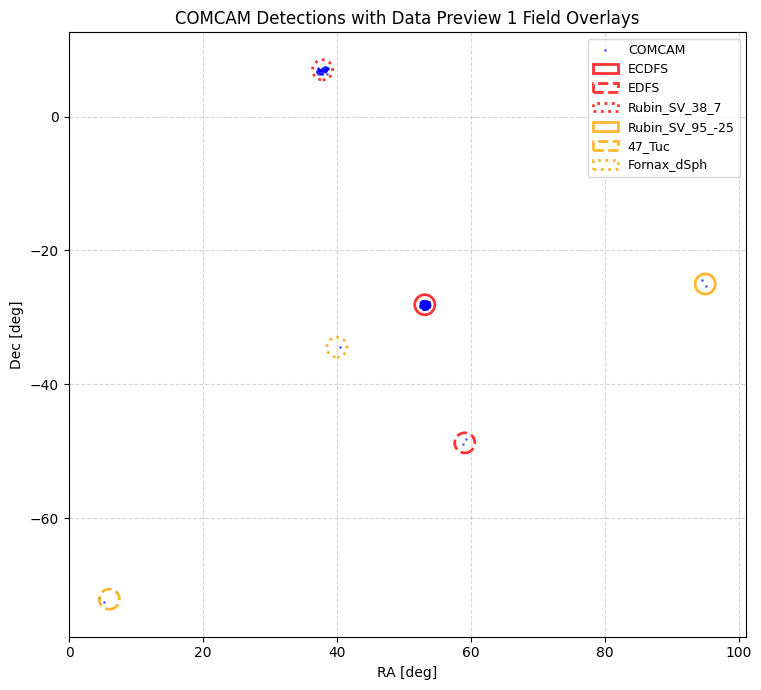

In [59]:
# Plot
fig, ax = plt.subplots(figsize=(10, 7))

# Scatter COMCAM sources
ax.scatter(
    comcam_x_milliquas_computed['coord_ra_COM'],
    comcam_x_milliquas_computed['coord_dec_COM'],
    s=1,
    c='blue',
    alpha=0.5,
    label='COMCAM'
)

# Draw each field as a circle
field_radius = 1.5  # degrees
for name, (ra, dec) in fields.items():
    color, linestyle = field_styles[name]
    circle = Circle(
        (ra, dec),
        radius=field_radius,
        edgecolor=color,
        facecolor='none',
        linestyle=linestyle,
        linewidth=2,
        alpha=0.8,
        label=name
    )
    ax.add_patch(circle)

# Labels and formatting
ax.set_xlabel("RA [deg]")
ax.set_ylabel("Dec [deg]")
ax.set_title("COMCAM Detections with Data Preview 1 Field Overlays")
ax.legend(fontsize=9)
ax.set_aspect('equal', adjustable='box')
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [60]:
comcam_x_milliquas_computed[['coord_ra_COM','coord_ra_COM','objectForcedSource_COM']].head(5)

coord_ra_COM  coord_ra_COM  \
_healpix_29                                    
9583286184993797     37.784845     37.784845   
9589207111731327     38.493227     38.493227   
9601744588162284     38.280597     38.280597   
9605063056789129     38.325578     38.325578   
9606443063715214     37.703596     37.703596   

                                             objectForcedSource_COM  
_healpix_29                                                          
9583286184993797  [{parentObjectId: 0, coord_ra: 37.784845, coor...  
9589207111731327  [{parentObjectId: 0, coord_ra: 38.493227, coor...  
9601744588162284  [{parentObjectId: 0, coord_ra: 38.280597, coor...  
9605063056789129  [{parentObjectId: 0, coord_ra: 38.325578, coor...  
9606443063715214  [{parentObjectId: 0, coord_ra: 37.703596, coor...

In [61]:
bands = ["u", "g", "r", "i", "z", "y"]

def count_bands(entry):
    result = {}
    for band in bands:
        try:
            result[band] = (entry['band'] == band).sum()
        except Exception:
            result[band] = 0
    return result


# Apply to each row
band_counts = comcam_x_milliquas_computed["objectForcedSource_COM"].apply(count_bands)
# Turn into a proper DataFrame
band_counts_df = pd.DataFrame(band_counts.tolist()).fillna(0).astype(int)

# Add to original
for band in bands:
    comcam_x_milliquas_computed[f"n_{band}"] = band_counts_df[band].values

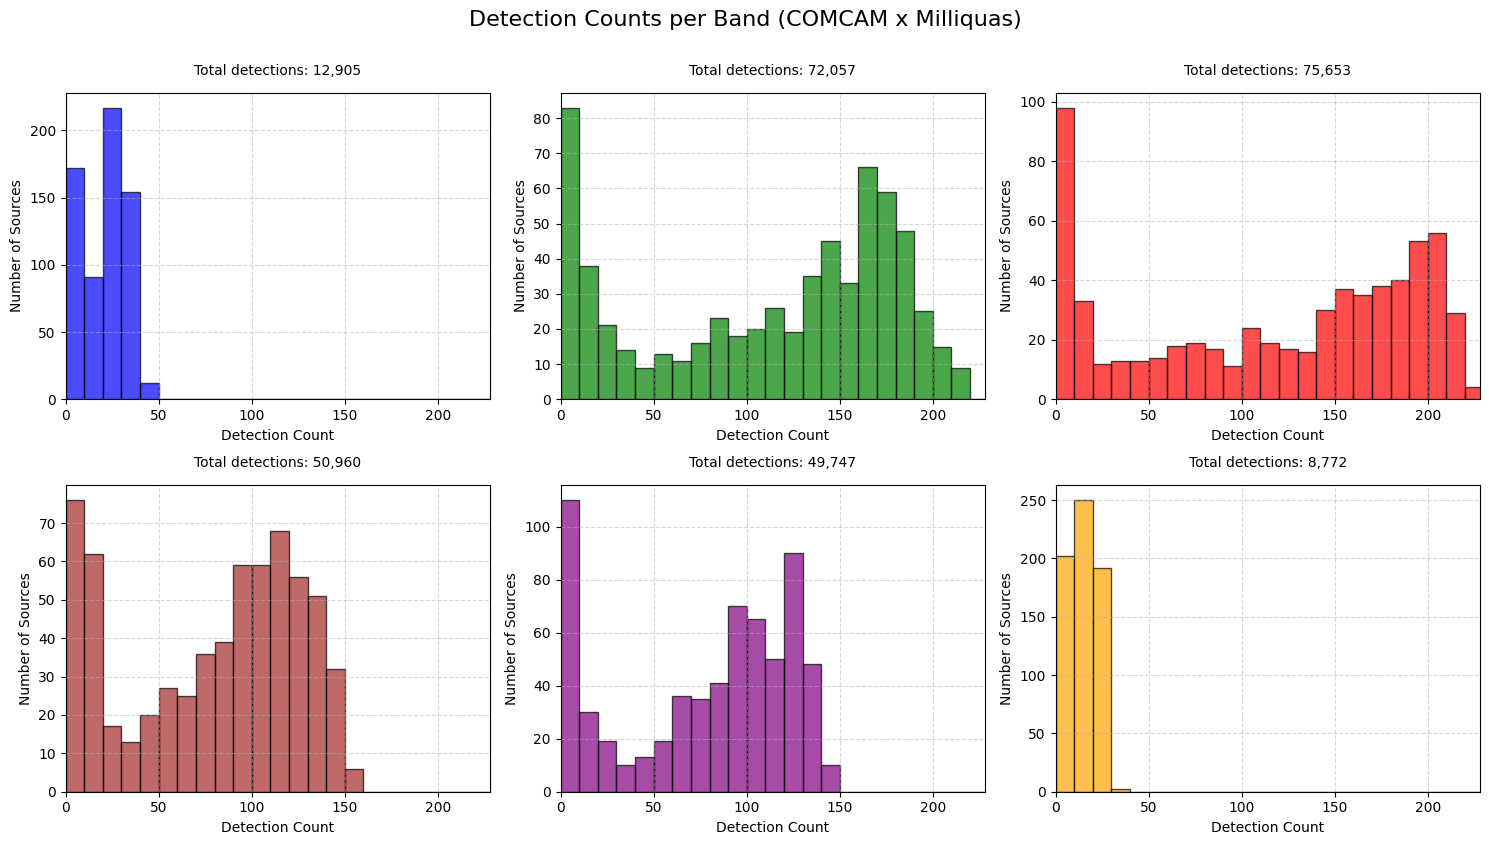

In [62]:
# Define band info: (column name, color)
bands = [
    ('n_u', 'blue'),
    ('n_g', 'green'),
    ('n_r', 'red'),
    ('n_i', 'brown'),
    ('n_z', 'purple'),
    ('n_y', 'orange'),
]

# Determine common bin range
all_counts = pd.concat([comcam_x_milliquas_computed[band] for band, _ in bands])
bin_min, bin_max = int(all_counts.min()), int(all_counts.max()) + 1
bins = list(range(bin_min, bin_max + 10, 10))  # Bin width = 10

# Create 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for ax, (band, color) in zip(axes, bands):
    data = comcam_x_milliquas_computed[band].dropna()
    total_detections = int(data.sum())
    
    ax.hist(data, bins=bins, color=color, edgecolor='black', alpha=0.7)
    ax.set_xlabel("Detection Count")
    ax.set_ylabel("Number of Sources")
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xlim(bin_min, bin_max)

    # Add total detection count above the plot
    ax.text(0.5, 1.05, f"Total detections: {total_detections:,}", 
            transform=ax.transAxes, ha='center', va='bottom', 
            fontsize=10, color='black')

plt.tight_layout()
plt.suptitle("Detection Counts per Band (COMCAM x Milliquas)", fontsize=16, y=1.05)
plt.show()

## Plot lightcurves



### Mag LCs

Referencing plots in: https://github.com/lsst-sitcom/linccf/blob/main/demo_notebooks/periodic_lightcurves.ipynb

In [67]:
comcam_AGN_many_r = comcam_x_milliquas_computed[comcam_x_milliquas_computed['n_r']>220]

In [68]:
comcam_AGN_many_r


objectId_COM  refFwhm_COM shape_flag_COM  \
_healpix_29                                                           
2528717015381367360  611254316728075422     0.806249          False   
2528737242888009711  611254385447546808     0.800263          False   
2528741223213224321  611255072642313383     0.797805          False   

                     parentObjectId_COM         x_COM        y_COM  xErr_COM  \
_healpix_29                                                                    
2528717015381367360  611254316728060375   11752.03193  4540.955771  0.003435   
2528737242888009711  611254385447535751   13295.87167  3735.193168    0.0009   
2528741223213224321  611255072642302502  13090.730255  6248.028144  0.043166   

                     yErr_COM  shape_yy_COM  shape_xx_COM  ...  \
_healpix_29                                                ...   
2528717015381367360  0.003459      7.044219      6.590621  ...   
2528737242888009711  0.000881      4.075792      4.155044  ...   
2528741223213224321  0.043393      5.217817      4.911573  ...   

                                  RNAME_MIL               LOBE1_MIL  \
_healpix_29                                                           
2528717015381367360                                                   
2528737242888009711                                                   
2528741223213224321                                                   

                                  LOBE2_MIL  _dist_arcsec  n_u  n_g  n_r  n_i  \
_healpix_29                                                                     
2528717015381367360                              0.008339   39  213  227  152   
2528737242888009711                              0.005526   41  217  227  148   
2528741223213224321                              0.057753   37  212  226  146   

                     n_z  n_y  
_healpix_29                    
2528717015381367360  141   30  
2528737242888009711  143   28  
2528741223213224321  145   30  

[3 rows x 96 columns]

AttributeError: 'Series' object has no attribute 'ra_COM'

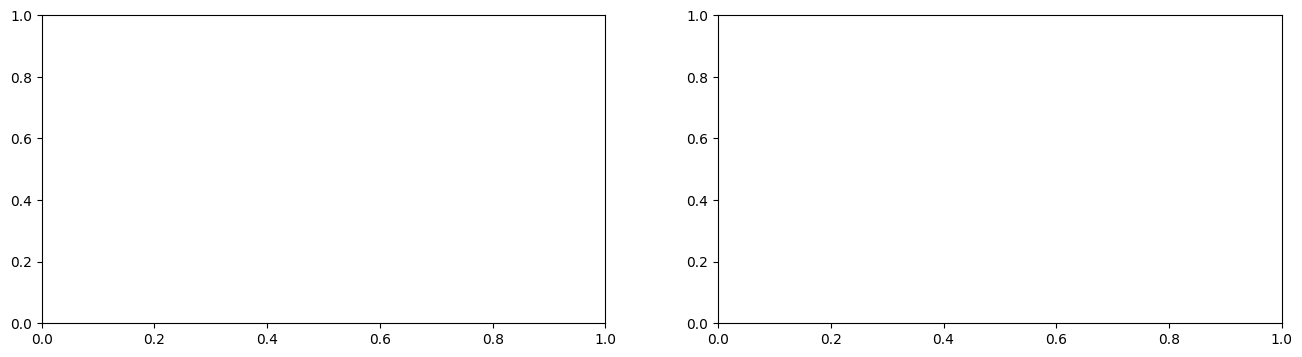

In [23]:
COLORS = {'u': '#0c71ff',
 'g': '#49be61',
 'r': '#c61c00',
 'i': '#ffc200',
 'z': '#f341a2',
 'y': '#5d0000'}

def create_mag_errors(flux, flux_err):
    # Make sure everything is valid and flux ± err stays positive
    upper = flux + flux_err
    lower = flux - flux_err
    mask = (
        flux.notna()
        & flux_err.notna()
        & (flux > 0)
        & (upper > 0)
        & (lower > 0)
    )

    # Initialize with NaNs
    mag = np.full_like(flux, np.nan, dtype=float)
    mag_err = np.full_like(flux, np.nan, dtype=float)

    # Apply the AB mag conversion only to valid values
    valid_flux = flux[mask]
    valid_err = flux_err[mask]

    mag[mask] = u.nJy.to(u.ABmag, valid_flux)
    upper_mag = u.nJy.to(u.ABmag, valid_flux + valid_err)
    lower_mag = u.nJy.to(u.ABmag, valid_flux - valid_err)
    mag_err[mask] = -(upper_mag - lower_mag) / 2

    return pd.Series(mag, index=flux.index), pd.Series(mag_err, index=flux.index)

def plot_mag_scale(ax, lc, flux_col, flux_err_col, x_name, x_label, show_legend=False):
    mag_vals = []
    for band, color in COLORS.items():
        band_lc = lc.query(f"band == '{band}'")
        if band_lc.empty:
            continue
        mag, mag_err = create_mag_errors(band_lc[flux_col], band_lc[flux_err_col])
        ax.errorbar(
            band_lc[x_name],
            mag,
            mag_err,
            fmt="o",
            label=band,
            color=color,
            alpha=1,
            markersize=5,
            capsize=3,
            elinewidth=1,
        )
        mag_vals.extend(mag.dropna().values)
    ax.set_xlabel(x_label)
    ax.set_ylabel("Magnitude (AB)")
    ax.invert_yaxis()
    if show_legend:
        ax.legend(loc="lower right", fontsize=12)
    return mag_vals

def scale_mag_y_axis(ax, all_mags):
    if all_mags[0]:
        ymin, ymax = np.nanmin(all_mags[0]), np.nanmax(all_mags[0])
        for i in range(2):
            ax[0, i].set_ylim(ymax + 0.1, ymin - 0.1)

def plot_mag_lightcurves(ax, row):
    datasets = [
        ("scienceFlux", "DIA Source", row.diaSource_COM),
        ("psfFlux", "DIA Forced", row.diaObjectForcedSource_COM),
    ]
    all_mags = [[], []]
    for i, (flux_col, label, lc) in enumerate(datasets):
        flux_err_col = f"{flux_col}Err"
        ax[0, i].set_title(f"{flux_col} ({label})")

        all_mags[0].extend(
            plot_mag_scale(ax[0, i], lc, flux_col, flux_err_col, "midpointMjdTai", "MJD", show_legend=(i == 0))
        )
    return all_mags

# Now plot
for i in range(len(comcam_AGN_many_r)):
    row = comcam_AGN_many_r.iloc[i]
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))  # Just one row now
    fig.suptitle(f"RA={row.ra_COM:.5f}, Dec={row.dec_COM:.5f}", fontsize=16)
    all_mags = plot_mag_lightcurves(np.expand_dims(ax, 0), row)  # Make ax 2D for consistency
    scale_mag_y_axis(np.expand_dims(ax, 0), all_mags)
    plt.tight_layout()
    plt.show()

In [ ]:
row.diaObjectForcedSource_COM

### Flux LCs

In [ ]:
def plot_flux_scale(ax, lc, flux_col, flux_err_col, x_name, x_label, show_legend=False):
    flux_vals = []
    for band, color in COLORS.items():
        band_lc = lc.query(f"band == '{band}'")
        if band_lc.empty:
            continue
        ax.errorbar(
            band_lc[x_name],
            band_lc[flux_col],
            band_lc[flux_err_col],
            fmt="o",
            label=band,
            color=color,
            alpha=1,
            markersize=5,
            capsize=3,
            elinewidth=1,
        )
        flux_vals.extend(band_lc[flux_col].dropna().values)
    ax.set_xlabel(x_label)
    ax.set_ylabel(f"{flux_col} (nJy)")
    if show_legend:
        ax.legend(loc="upper right", fontsize=12)
    return flux_vals

def scale_flux_y_axis(ax, all_flux):
    if all_flux[0]:
        ymin, ymax = np.nanmin(all_flux[0]), np.nanmax(all_flux[0])
        for i in range(3):
            ax[0, i].set_ylim(ymin - 0.1 * abs(ymin), ymax + 0.1 * abs(ymax))

def plot_flux_lightcurves(ax, row):
    datasets = [
        ("scienceFlux", "DIA Source", row.diaSource_COM),
        ("psfDiffFlux", "DIA Forced", row.diaObjectForcedSource_COM),
        ("psfFlux", "DIA Forced", row.diaObjectForcedSource_COM),
    ]
    all_flux = [[]]
    for i, (flux_col, label, lc) in enumerate(datasets):
        flux_err_col = f"{flux_col}Err"
        ax[0, i].set_title(f"{flux_col} ({label})")

        all_flux[0].extend(
            plot_flux_scale(ax[0, i], lc, flux_col, flux_err_col, "midpointMjdTai", "MJD", show_legend=(i == 0))
        )
    return all_flux

for i in good_indices:
    row = ndf.loc[i]
    fig, ax = plt.subplots(1, 3, figsize=(16, 4))
    fig.suptitle(f"RA={row.ra_COM:.5f}, Dec={row.dec_COM:.5f}", fontsize=16)
    all_flux = plot_flux_lightcurves(np.expand_dims(ax, 0), row)
    scale_flux_y_axis(np.expand_dims(ax, 0), all_flux)
    plt.tight_layout()
    plt.show()


In [ ]:
# Flux error bars--there, just small

row = ndf.loc[good_indices[0]]
row.diaObjectForcedSource_COM[["psfFlux", "psfFluxErr"]].describe()

## Plot structure function

Referencing: https://github.com/rubin-dp0/delegate-contributions-dp02/blob/main/variable_stars/var_stars_sf.ipynb

In [ ]:
from numba import njit

@njit
def calcSF(taumin, taumax, tclip, fclip, nstep):
    dtau = (np.log10(taumax) - np.log10(taumin)) / nstep

    tau1 = np.zeros(nstep)
    tau2 = np.zeros(nstep)
    N = np.zeros(nstep)
    SF = np.zeros(nstep)

    for k in range(nstep):
        tau1[k] = 10**(np.log10(taumin) + k*dtau)
        tau2[k] = 10**(np.log10(tau1[k]) + dtau)
        for i in range(tclip.size):
            dist = tclip[i:] - tclip[i]
            sel = (dist >= tau1[k]) & (dist < tau2[k])
            N[k] += tclip[i:][sel].size
            if tclip[i:][sel].size > 0:
                SF[k] += np.sum((fclip[i:][sel] - fclip[i])**2)
        SF[k] = np.sqrt(SF[k] / N[k]) if N[k] > 0 else np.nan

    return tau1, tau2, SF, N


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def SF_analysis(df, nstep=50, Nmin=2):
    objects = df['Object_ID'].unique()

    for obj in objects:
        obj_data_all = df[df['Object_ID'] == obj]

        fig_sf, ax_sf = plt.subplots(figsize=(7, 3))
        ax_sf.set_title(f"Structure Function: {obj}")

        for filt in sorted(df['Filter'].unique()):
            filt_data = obj_data_all[obj_data_all['Filter'] == filt].drop_duplicates(subset='Epoch')
            if filt_data.empty:
                continue

            filt_data = filt_data.sort_values(by='Epoch')
            mag = filt_data['Mag']

            # Iterative 5σ clipping
            count_old = len(mag) + 1
            count = len(mag)
            excluded = [[], []]

            while count_old > count:
                mag_mean = mag.mean()
                mag_std = mag.std(ddof=1)
                outliers = np.abs(mag - mag_mean) >= 5 * mag_std
                excluded[0] += filt_data['Epoch'][outliers].to_list()
                excluded[1] += mag[outliers].to_list()
                filt_data = filt_data[~outliers]
                mag = filt_data['Mag']
                count_old = count
                count = len(mag)

            if filt_data.empty:
                continue

            # Convert mag → normalized flux
            flux = 10**(-0.4 * (mag - np.median(mag)))
            time = filt_data['Epoch'].to_numpy()

            # SF time limits
            dtmin = np.min(np.diff(time))
            dtmax = time[-1] - time[0]
            taumin = 2 * dtmin
            taumax = 0.5 * dtmax

            tau1, tau2, SF, N = calcSF(taumin, taumax, time, flux.to_numpy(), nstep)

            ax_sf.loglog(tau1[N > Nmin], SF[N > Nmin], label=filt, marker="o", linestyle="")

        ax_sf.set_xlabel("Time lag (days)")
        ax_sf.set_ylabel("Structure Function")
        ax_sf.grid(True)
        ax_sf.legend()
        plt.show()


In [ ]:
def make_long_df(catalog):
    rows = []
    for _, row in catalog.iterrows():
        obj_id = row.diaObjectId_COM
        for table in ['diaSource_COM', 'diaObjectForcedSource_COM']:
            lc = row[table]
            if lc.empty:
                continue
            for _, lc_row in lc.iterrows():
                if lc_row['psfFlux'] > 0 and not lc_row['psfFlux_flag']:
                    flux = lc_row['psfFlux']
                    flux_err = lc_row['psfFluxErr']
                    mag = -2.5 * np.log10(flux / 3631e9)  # Convert nJy to AB mag
                    rows.append({
                        'Object_ID': obj_id,
                        'Filter': lc_row['band'],
                        'Epoch': lc_row['midpointMjdTai'],
                        'psfFlux': flux,
                        'psfFluxErr': flux_err,
                        'Mag': mag,
                    })
    return pd.DataFrame(rows)

In [ ]:
good_df = ndf.loc[good_indices]
lc_long_df = make_long_df(good_df)
SF_analysis(lc_long_df)

### All on the same plot

In [ ]:
def SF_compare_plot(df, nstep=50, Nmin=2, legend=True):
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.set_title("Structure Functions (All Objects)")
    
    for obj in df['Object_ID'].unique():
        obj_data_all = df[df['Object_ID'] == obj]

        for filt in sorted(df['Filter'].unique()):
            filt_data = obj_data_all[obj_data_all['Filter'] == filt].drop_duplicates(subset='Epoch')
            if filt_data.empty:
                continue

            filt_data = filt_data.sort_values(by='Epoch')
            mag = filt_data['Mag']
            count_old = len(mag) + 1
            count = len(mag)
            while count_old > count:
                mag_mean = mag.mean()
                mag_std = mag.std(ddof=1)
                filt_data = filt_data[np.abs(mag - mag_mean) < 5 * mag_std]
                mag = filt_data['Mag']
                count_old = count
                count = len(mag)

            if filt_data.empty:
                continue

            flux = 10**(-0.4 * (mag - np.median(mag)))
            time = filt_data['Epoch'].to_numpy()
            dtmin = np.min(np.diff(time))
            dtmax = time[-1] - time[0]
            taumin = 2 * dtmin
            taumax = 0.5 * dtmax

            tau1, tau2, SF, N = calcSF(taumin, taumax, time, flux.to_numpy(), nstep)
            
            label = f"{obj} ({filt})"
            ax.loglog(tau1[N > Nmin], SF[N > Nmin], label=label, marker="o", linestyle="")

    ax.set_xlabel("Time lag (days)")
    ax.set_ylabel("Structure Function")
    ax.grid(True)
    if legend:
        ax.legend()
    plt.show()


In [ ]:
SF_compare_plot(lc_long_df)

### Adjust cut from >20 to >10 sources

In [ ]:
good_indices_cut_at_10 = []

for i in ndf.index:
    if ndf.loc[i, "nDiaSources_COM"] > 10:
        print(f"Row {i} has {ndf.loc[i, 'nDiaSources_COM']} sources")
        good_indices_cut_at_10.append(i)

print(len(good_indices_cut_at_10))

In [ ]:
good_df_cut_at_10 = ndf.loc[good_indices_cut_at_10]
lc_long_df_cut_at_10 = make_long_df(good_df_cut_at_10)
SF_compare_plot(lc_long_df_cut_at_10, legend=False)